# Aufgaben und Lösungen zu Entscheidunsbäumen selbst erstellen
Mit diesem Notebook können Sie auf einfache Weise
- beliebig viele zufällige Daten erzeugen
- mit von Ihnen festgelegten Namen für Merkmale und Werte.
- Für diese Daten kann dann ein Entscheidungsbaum gelernt
- und visualisiert werden  (für die Musterlösung)
- Gini-Unreinheiten können automatisch berechnet werden (Musterlösung)
- Durch Festlegen eines Random Seeds sind die Ergebnisse reproduzierbar.
- Sie können aber durch Verändern des Random Seeds auch einfach so lange ausprobieren, bis sich "schöne" Bäume ergeben

In [1]:
import pandas as pd   
# Falls pandas nicht installiert ist, eine der folgenden Zeilen einkommentieren und ausführen
# !conda install pandas
# !pip install pandas

from entscheidungsbaum import tree2graphviz_digraph, viel_info_attribut_fn, keine_info_attribut_fn
from entscheidungsbaumlerner import DecisionTreeLearner
from zufallsdaten import generiere_eindeutige_daten

## Daten entweder aus einer Datei einlesen oder zufällig generieren lassen

In [2]:
# Alternative 1: Daten aus einer Datei laden
DATA_FILE = "data/Wochenendaktivitaeten.csv"
df = pd.read_csv(DATA_FILE)

In [3]:
# Alternative 2: Zufallsdaten generieren
import random

# Setze den Zufallszahlengenerator auf einen festen Wert, um reproduzierbare Ergebnisse zu erhalten
SEED = 5
random.seed(SEED)
print(f"Random seed (um zufällige Daten reproduzieren zu können): {SEED}")

anzahl_datensaetze = 20

# Liste der Merkmale und ihrer möglichen Werte
# Format: (Merkmalsname, [Wert1, Wert2, ...])
# Für "neue" Aufgaben einfach die Features und Werte umbenennen und
# mit einem neuem Seed neue Zufallsdaten generieren
feature_liste = [
    ('Farbe', ['Schwarz', 'Weiß']),  
    ('Größe', ['Klein', 'Mittel', 'Groß']), 
    ('Gewicht', ['Leicht', 'Mittel', 'Schwer']),
    ('Wertvoll?', ['Ja', 'Nein'])  
]


df = generiere_eindeutige_daten(anzahl_datensaetze, feature_liste)
print(f"Es wurden {len(df)} Datensätze generiert:")

# DataFrame anzeigen - gut für einen Screenshot auf dem Arbeitsblatt ;-)
df

Random seed (um zufällige Daten reproduzieren zu können): 5
Es wurden 12 Datensätze generiert:


,Farbe,Größe,Gewicht,Wertvoll?
0,Weiß,Klein,Leicht,Nein
1,Schwarz,Klein,Schwer,Ja
2,Weiß,Groß,Leicht,Nein
3,Schwarz,Groß,Mittel,Nein
4,Schwarz,Mittel,Mittel,Nein
5,Schwarz,Klein,Leicht,Nein
6,Schwarz,Klein,Mittel,Nein
7,Weiß,Klein,Mittel,Ja
8,Schwarz,Mittel,Schwer,Nein
9,Weiß,Klein,Schwer,Nein


## Auswählen, welches Feature vom Entscheidungsbaum vorausgesagt werde soll

In [4]:
# Standardmäßig wird das letzte Merkmal als Zielmerkmal angenommen:
TARGET_FEATURE = df.columns[-1]
# Wenn man das nicht will, kann man das Zielmerkmal auch explizit angeben:
# TARGET_FEATURE = "IrgendeinAndersMerkmal"

# Der Entscheidungsbaum-Lerner arbeitet mit Dictionarys, nicht mit DataFrames,
# also wandeln wir das DataFrame um:
data = df.to_dict(orient="records")

## Beispieloperation für den algorithmischen Teil einer Aufgabe

In [5]:
# Musterlösung für die Pseudocode-Aufgabe aus der Probeabi
def genauigkeit(zielwerte: list, vorhersagen: list) -> float:
    """Berechnet die Genauigkeit (accuracy) der Vorhersagen."""
    anzahl = len(zielwerte)
    richtig = 0
    for i in range(anzahl):
        if zielwerte[i] == vorhersagen[i]:
            richtig += 1
    return richtig / anzahl

## Der eigentliche Lernvorgang

In [6]:
learner = DecisionTreeLearner(data, TARGET_FEATURE)

# HIER KANN MAN HERUMSPIELEN
TIEFE = 1
TIEFE = 2
# TIEFE = 3

tree = learner.learn(TIEFE)  # Hier wird der Baum gelernt!!!
print("Baum wurde gelernt.")


Baum wurde gelernt.


## Lernvorgang analysieren
Dies sind nur erste einfache Beispiele, die zeigen, wie man die Qualität des Gelernten untersuchen kann.

In [7]:
print("Wie gut ist der Baum?")
zielwerte = [datensatz[TARGET_FEATURE] for datensatz in data]
vorhersagen = [tree.predict(datensatz) for datensatz in data]
accuracy = genauigkeit(zielwerte, vorhersagen)
print(f"Genauigkeit: {accuracy:.4f}")
print(f"{round(accuracy*len(data))} von {len(data)} Datensätzen korrekt vorhergesagt.")

print("Einzelne Datensätze klassifizieren (s. Probeabi):")
for beispiel in [8, 9]:
    print(f"Datensatz {beispiel}:", data[beispiel])
    print("    wird vom Baum klassifiziert als:", tree.predict(data[beispiel]))

Wie gut ist der Baum?
Genauigkeit: 0.9167
11 von 12 Datensätzen korrekt vorhergesagt.
Einzelne Datensätze klassifizieren (s. Probeabi):
Datensatz 8: {'Farbe': 'Schwarz', 'Größe': 'Mittel', 'Gewicht': 'Schwer', 'Wertvoll?': 'Nein'}
    wird vom Baum klassifiziert als: Nein
Datensatz 9: {'Farbe': 'Weiß', 'Größe': 'Klein', 'Gewicht': 'Schwer', 'Wertvoll?': 'Nein'}
    wird vom Baum klassifiziert als: Ja


## Baum visualisieren

In [8]:
# Für die Visualisierung des Baums muss graphviz installiert sein.
# Mit Anaconda: 
# !conda install -y graphviz python-graphviz

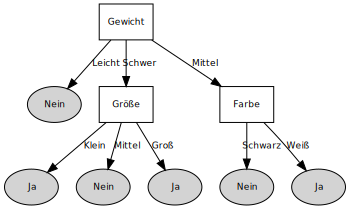

In [9]:
attribute_viz_fn = keine_info_attribut_fn
# attribute_viz_fn = viel_info_attribut_fn

g = tree2graphviz_digraph(tree, attribute_viz_fn)
g.graph_attr = dict()
g.node_attr = dict(fontname="Calibri", fontsize="9")
g.edge_attr = dict(fontname="Calibri", fontsize="9")

g 

### Gini-Unreinheiten explizit berechnen

In [10]:
gini = learner.gini_impurity(data)
print(f"Gini Impurity für alle Daten: {gini:.4f}")

print("Einzelschritte für die Musterlösung:")
anzahl = len(data)
gini = 1
splits = learner.split_data(data, TARGET_FEATURE)
for wert, subset in splits.items():
    p_i = len(subset) / anzahl
    print(f"p({wert}) = {p_i:.4f}")
    gini -= p_i * p_i
print(f"Gini Impurity für alle Daten: {gini:.4f}")

Gini Impurity für alle Daten: 0.4444
Einzelschritte für die Musterlösung:
p(Nein) = 0.6667
p(Ja) = 0.3333
Gini Impurity für alle Daten: 0.4444


In [11]:
SOME_FEATURE = "Größe"

print(f"Gewichtete Gini-Unreinheit für {SOME_FEATURE}: {learner.weighted_gini(data, SOME_FEATURE):.3f}")


print("Einzelschritte für die Musterlösung:")
n = len(learner.ALL_DATA)
splits = learner.split_data(learner.ALL_DATA, SOME_FEATURE)
weighted_gini_total = 0
for v, data_v in splits.items():
    p_v = len(data_v) / n
    gini_v = learner.gini_impurity(data_v)
    product = p_v * gini_v
    print(f"{v}: p_v = {len(data_v)}/{n} = {p_v:.2%}, gini_v = {gini_v:.3f}. Produkt: {product:.3f}")
    weighted_gini_total += product
print(f"weighted gini: {weighted_gini_total:.3f}")

Gewichtete Gini-Unreinheit für Größe: 0.389
Einzelschritte für die Musterlösung:
Klein: p_v = 6/12 = 50.00%, gini_v = 0.444. Produkt: 0.222
Groß: p_v = 4/12 = 33.33%, gini_v = 0.500. Produkt: 0.167
Mittel: p_v = 2/12 = 16.67%, gini_v = 0.000. Produkt: 0.000
weighted gini: 0.389
